In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spambase/spambase_csv.csv


### Markdown for Notebook

#### SPAM E-mail Dataset Analysis

This notebook perfos 8-10 key tasks of data analytics on the SPAM E-mail Database. Below is the workflow:

1. **Dataset Overview**:
   - Inspect dataset structure, types, and summary statistics.
   - Identify missing values.
2. **Correlation Analysis**:
   - Explore feature correlations using a heatmap.
3. **Spam Distribution**:
   - Analyze the distribution of spam (1) vs non-spam (0).
4. **Word Frequency Exploration**:
   - Identify top word frequencies in spam vs non-spam emails.
5. **Character Frequency Exploration**:
   - Explore the impact of special characters (`char_freq`) on spam classification.
6. **Capital Letter Analysis**:
   - Analyze `capital_run_length` features for spam vs non-spam.
7. **Feature Importance**:
   - Use logistic regression coefficients to identify key predictors.
8. **Classification Model**:
   - Train a logistic regression model to classify emails as spam or not.
   - Evaluate using confusion matrix, classification report, and ROC curve.
9. **Outlier Detection**:
   - Detect potential outliers in numeric features using boxplots.
10. **Custom Feature Engineering**:
   - Create new features to is')
plt.show()
```

This code executes the outlined 8-10 tasks. You can modify or add steps as needed. Let me know if you need further customization!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report   

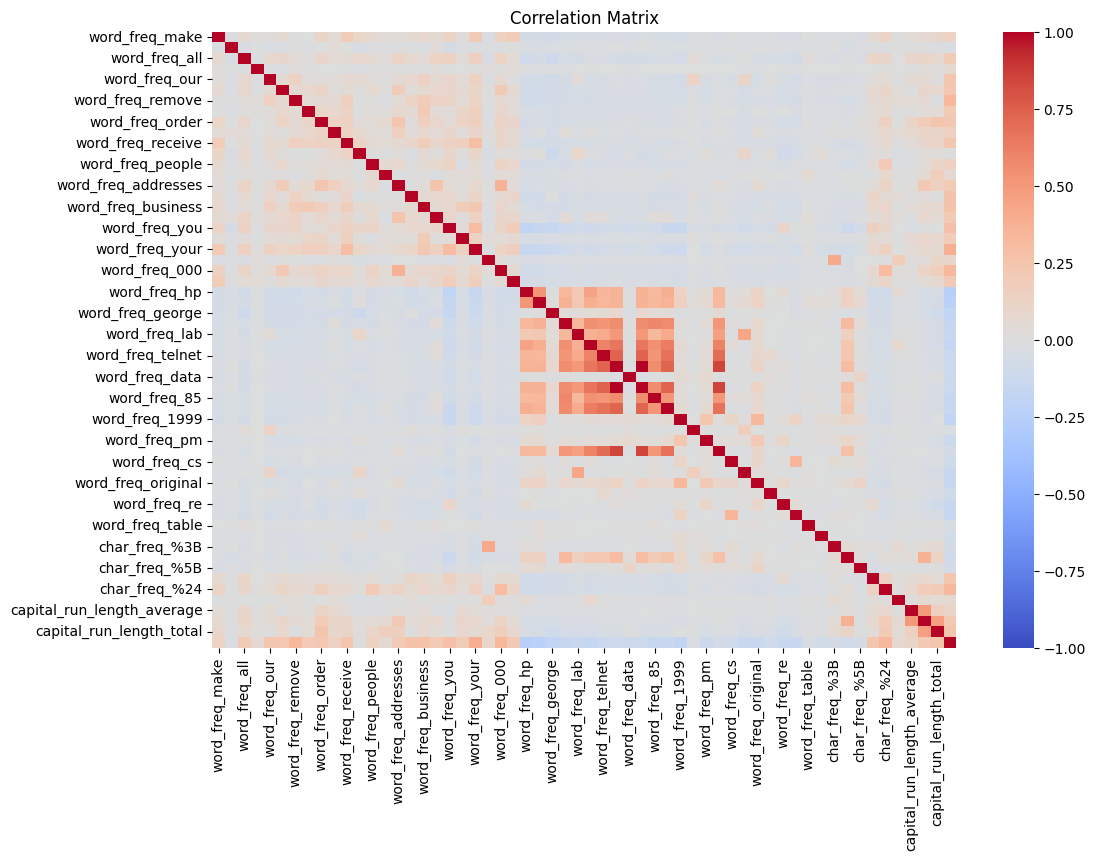

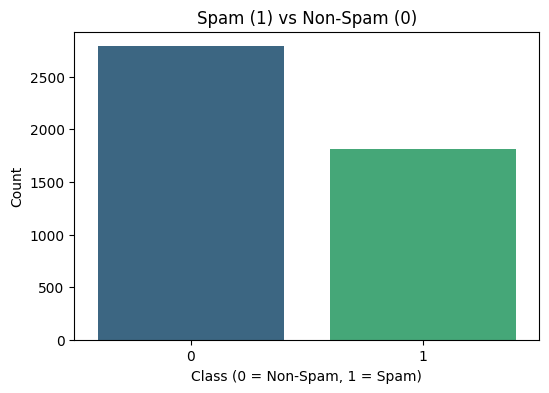

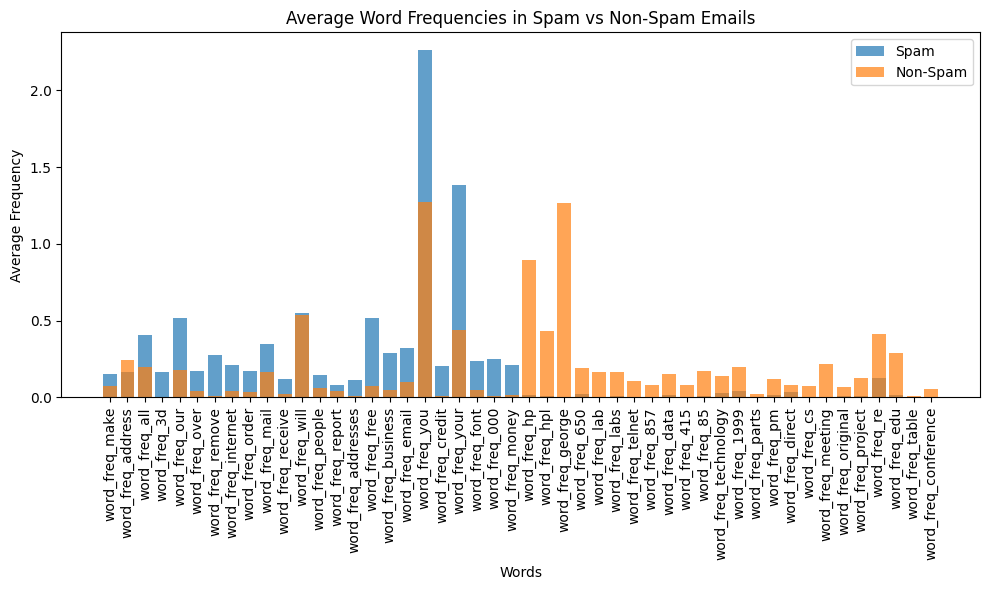

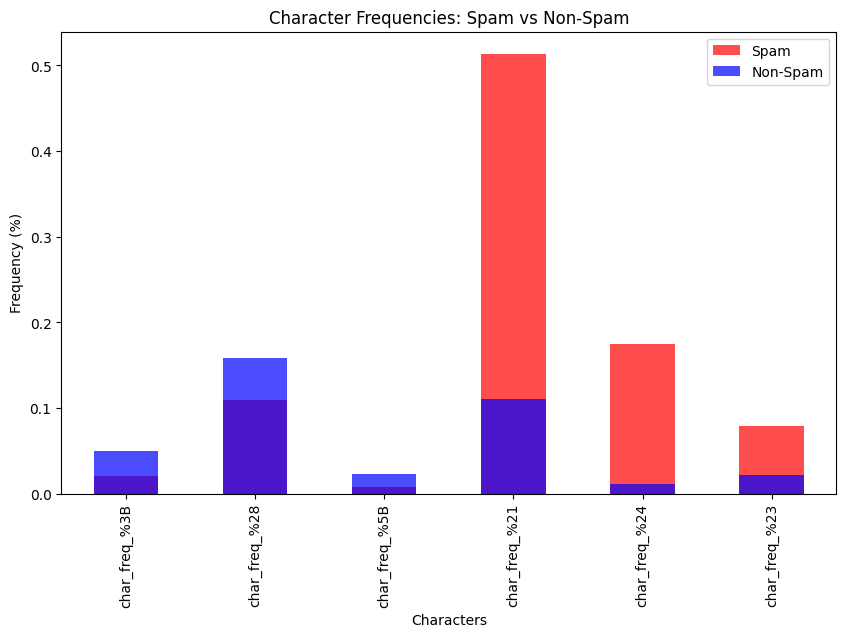

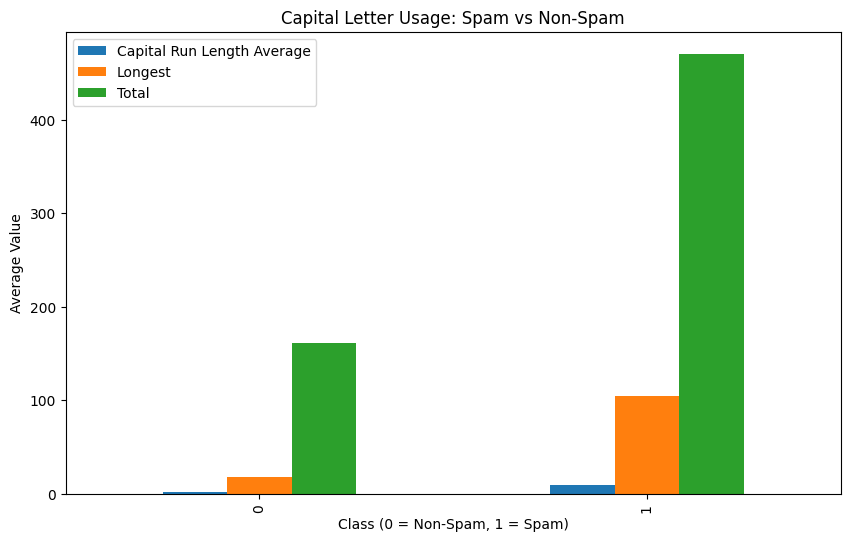

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


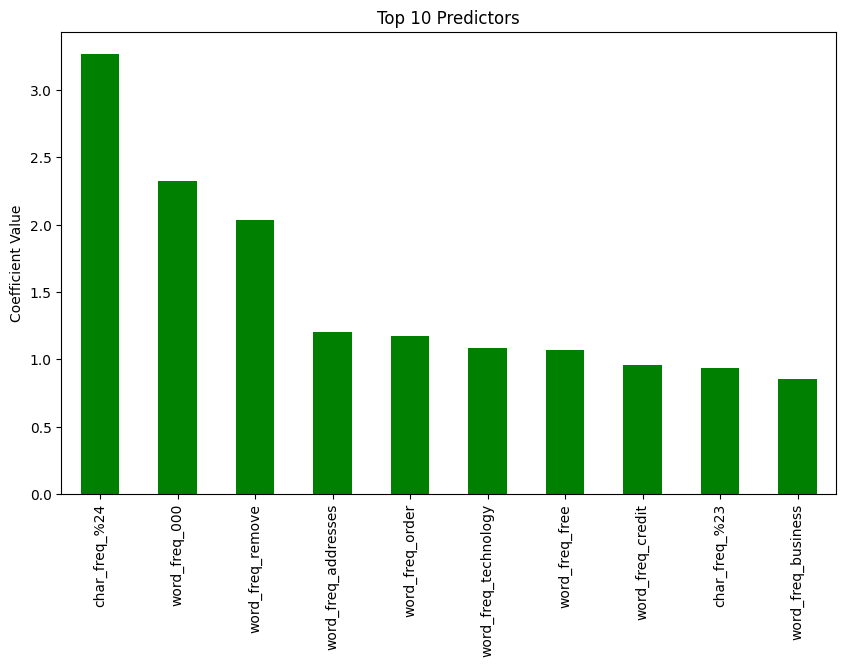


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



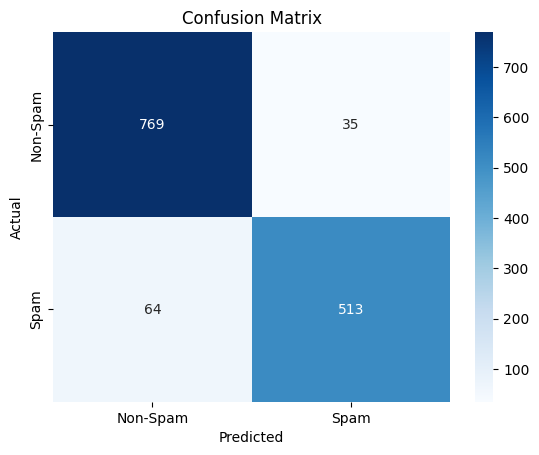

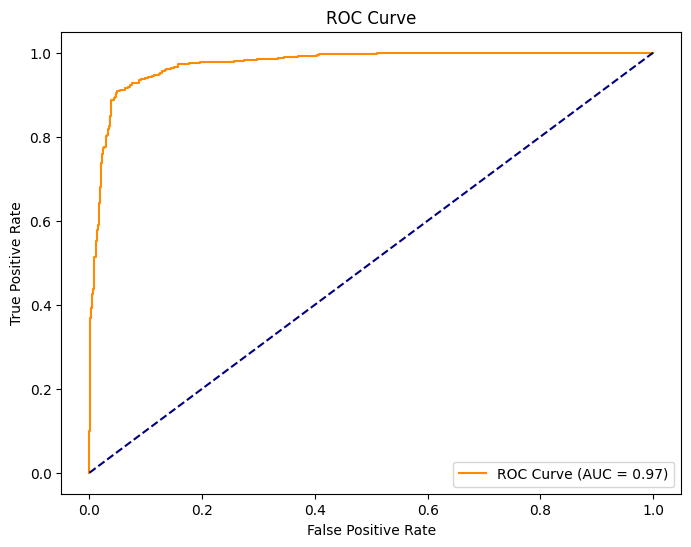

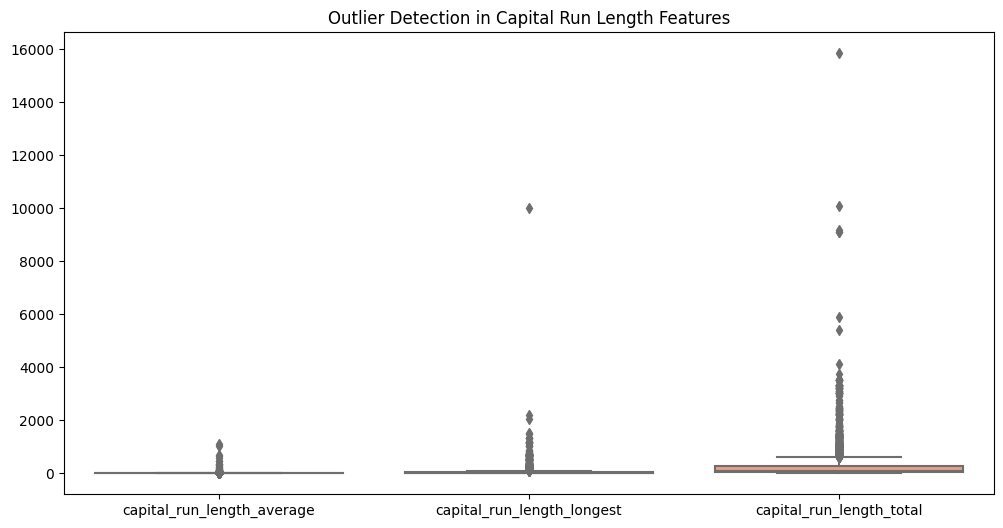

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
data_path = '/kaggle/input/spambase/spambase_csv.csv'
df = pd.read_csv(data_path)

# 1. Inspect the dataset
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# 2. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# 3. Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 4. Spam distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['class'], palette='viridis')
plt.title('Spam (1) vs Non-Spam (0)')
plt.xlabel('Class (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()

# 5. Top word frequencies
word_freq_cols = [col for col in df.columns if 'word_freq' in col]

# Update to use 'class' instead of 'spam'
spam_word_avg = df[df['class'] == 1][word_freq_cols].mean()
non_spam_word_avg = df[df['class'] == 0][word_freq_cols].mean()

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(word_freq_cols, spam_word_avg, label='Spam', alpha=0.7)
plt.bar(word_freq_cols, non_spam_word_avg, label='Non-Spam', alpha=0.7)
plt.title('Average Word Frequencies in Spam vs Non-Spam Emails')
plt.xlabel('Words')
plt.ylabel('Average Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Character frequencies
char_freq_cols = [col for col in df.columns if 'char_freq' in col]

# Update to use 'class' instead of 'spam'
spam_char_avg = df[df['class'] == 1][char_freq_cols].mean()
non_spam_char_avg = df[df['class'] == 0][char_freq_cols].mean()

# Plotting the character frequency comparison
plt.figure(figsize=(10, 6))
spam_char_avg.plot(kind='bar', color='red', alpha=0.7, label='Spam')
non_spam_char_avg.plot(kind='bar', color='blue', alpha=0.7, label='Non-Spam')
plt.title('Character Frequencies: Spam vs Non-Spam')
plt.xlabel('Characters')
plt.ylabel('Frequency (%)')
plt.legend()
plt.show()

# 7. Capital letter analysis
capital_cols = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

# Update to use 'class' instead of 'spam'
df.groupby('class')[capital_cols].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Capital Letter Usage: Spam vs Non-Spam')
plt.ylabel('Average Value')
plt.xlabel('Class (0 = Non-Spam, 1 = Spam)')
plt.legend(['Capital Run Length Average', 'Longest', 'Total'])
plt.show()

# 8. Logistic regression feature importance
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Predictors')
plt.ylabel('Coefficient Value')
plt.show()

# 9. Evaluate classification model
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 10. Outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[capital_cols], palette='coolwarm')
plt.title('Outlier Detection in Capital Run Length Features')
plt.show()

